# Unvelling the Android App Market: Analyzing Google Play Store

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Data Sets

In [2]:
app_data = pd.read_csv(r'D:\OASIS\PROJECT 4 PROPOSAL 2\apps.csv')
userreview_data = pd.read_csv(r'D:\OASIS\PROJECT 4 PROPOSAL 2\user_reviews.csv')

### Data Preparation

Information of Loaded Data Sets

In [3]:
app_data.info()
userreview_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #

App Data[Cleaning and correcting data types for accuracy]

In [4]:
# Convert 'Installs' column in app_data to numeric
app_data['Installs'] = app_data['Installs'].str.replace('+', '')
app_data['Installs'] = app_data['Installs'].str.replace(',', '').astype(int)

# Convert 'Price' column in app_data to numeric
app_data['Price'] = app_data['Price'].str.replace('$', '').astype(float)

# Convert 'Last Updated' column in app_data to datetime
app_data['Last Updated'] = pd.to_datetime(app_data['Last Updated'])

# Convert 'Reviews' column in app_data to numeric
app_data['Reviews'] = app_data['Reviews'].astype(int)

User Review Data[Cleaning and correcting data types for accuracy]

In [5]:
# Convert 'Sentiment' column in userreview_data to categorical
userreview_data['Sentiment'] = userreview_data['Sentiment'].astype('category')

# Fill missing values in userreview_data with appropriate values
userreview_data['Translated_Review'] = userreview_data['Translated_Review'].fillna('')
userreview_data['Sentiment_Polarity'] = userreview_data['Sentiment_Polarity'].fillna(0)
userreview_data['Sentiment_Subjectivity'] = userreview_data['Sentiment_Subjectivity'].fillna(0)

Data Preparation Results for both Data Sets

In [6]:
# Print data types of both datasets after conversion
print("Data types after conversion for app_data:")
print(app_data.dtypes)
print("\nData types after conversion for userreview_data:")
print(userreview_data.dtypes)

Data types after conversion for app_data:
Unnamed: 0                 int64
App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

Data types after conversion for userreview_data:
App                         object
Translated_Review           object
Sentiment                 category
Sentiment_Polarity         float64
Sentiment_Subjectivity     float64
dtype: object


In [7]:
# Check DataFrame columns
print(app_data.columns)

# Inspect DataFrame
print(app_data.head())

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free    0.0   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free    0.0   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free    0.0   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free    0.0   
4  ART_AND_DESIGN     4.3      967   2.8    100

In [8]:
userreview_data
# Check DataFrame columns
print(userreview_data.columns)

# Inspect DataFrame
print(userreview_data.head())

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                      
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                0.00                0.000000  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


### 1 Key Concept and Challenge Completed
Data Preparation: Clean and correct data types for accuracy

# Category Exploration

Number of apps in each Category

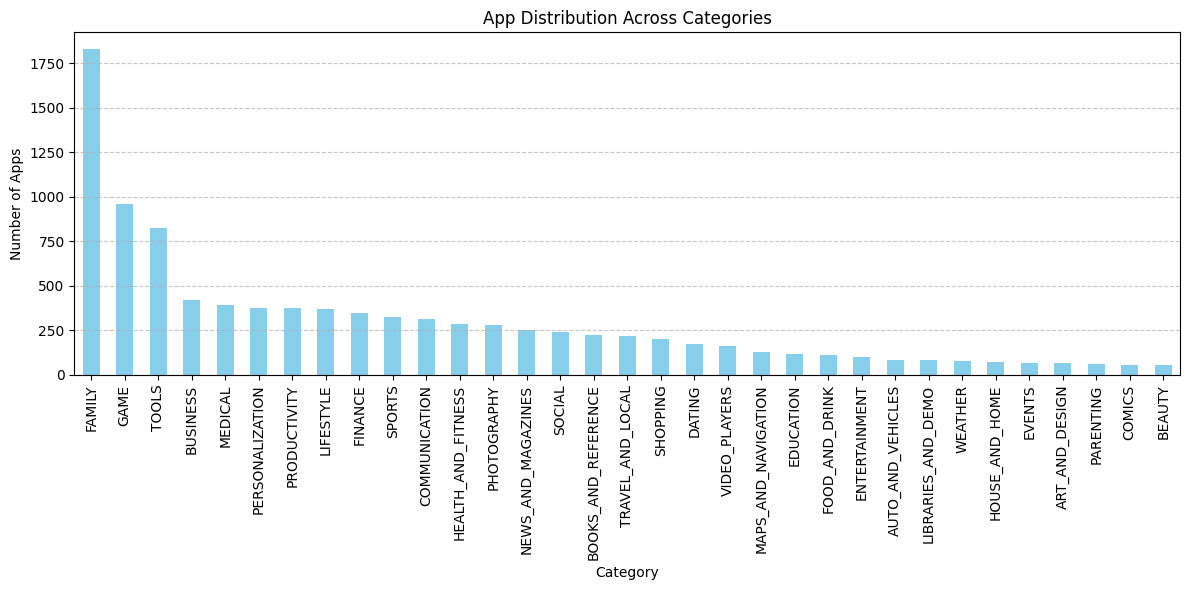

In [9]:
# Count the number of apps in each category
category_counts = app_data['Category'].value_counts()

# Plot the distribution of apps across categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Identify top categories with the highest number of apps

In [10]:
# Calculate the percentage distribution of apps across categories
category_percentages = (category_counts / len(app_data)) * 100

# Identify top categories with the highest number of apps
top_categories = category_counts.head(10)
print("Top Categories:")
print(top_categories)

Top Categories:
Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64


Top 10 Highest-Rated & Top 10 Most Downloaded Apps

In [11]:
# Top 10 highest-rated apps
top_10_highest_rated = app_data.sort_values(by='Rating', ascending=False).head(10)

# Top 10 apps with the most downloads
top_10_most_downloads = app_data.sort_values(by='Installs', ascending=False).head(10)

print("Top 10 Highest-rated Apps:")
print(top_10_highest_rated[['App', 'Rating']])

print("\nTop 10 Apps with Most Downloads:")
print(top_10_most_downloads[['App', 'Installs']])

Top 10 Highest-rated Apps:
                                            App  Rating
4703         Jobs in Canada - Emplois au Canada     5.0
6120                             CD CHOICE TUBE     5.0
6151                                   CE Smart     5.0
6160  TI-84 CE Graphing Calculator Manual TI 84     5.0
8220                                   EG India     5.0
6998                    cx advance call blocker     5.0
6168                                  MCQ CE IT     5.0
6993                                 Oración CX     5.0
8241                       Eh Bee Wallpapers HD     5.0
6195                                    CF Life     5.0

Top 10 Apps with Most Downloads:
                               App    Installs
300             WhatsApp Messenger  1000000000
152              Google Play Books  1000000000
1356                Subway Surfers  1000000000
2420     Maps - Navigate & Explore  1000000000
304                          Gmail  1000000000
2003                     Instagram  10000

Category analysis: Average Rating, Reviews, and Price

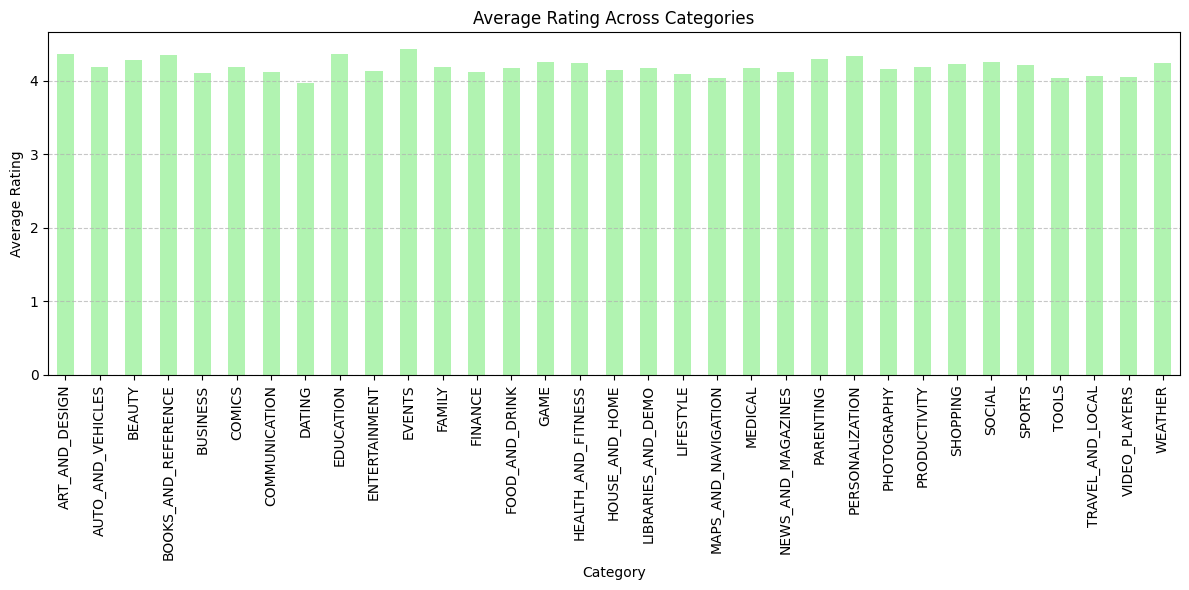

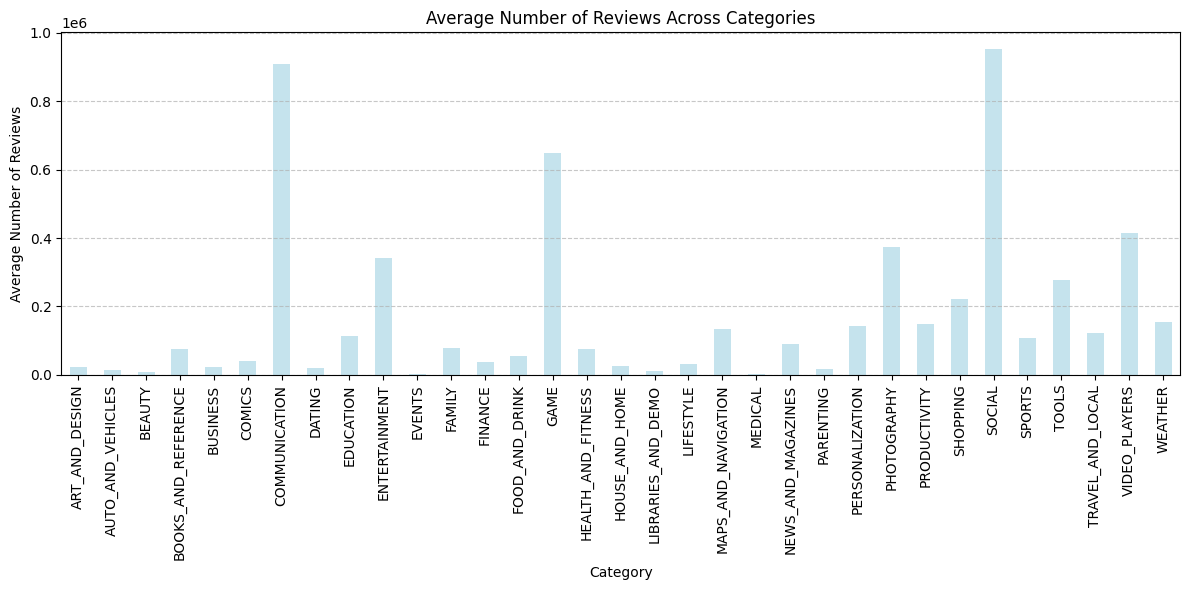

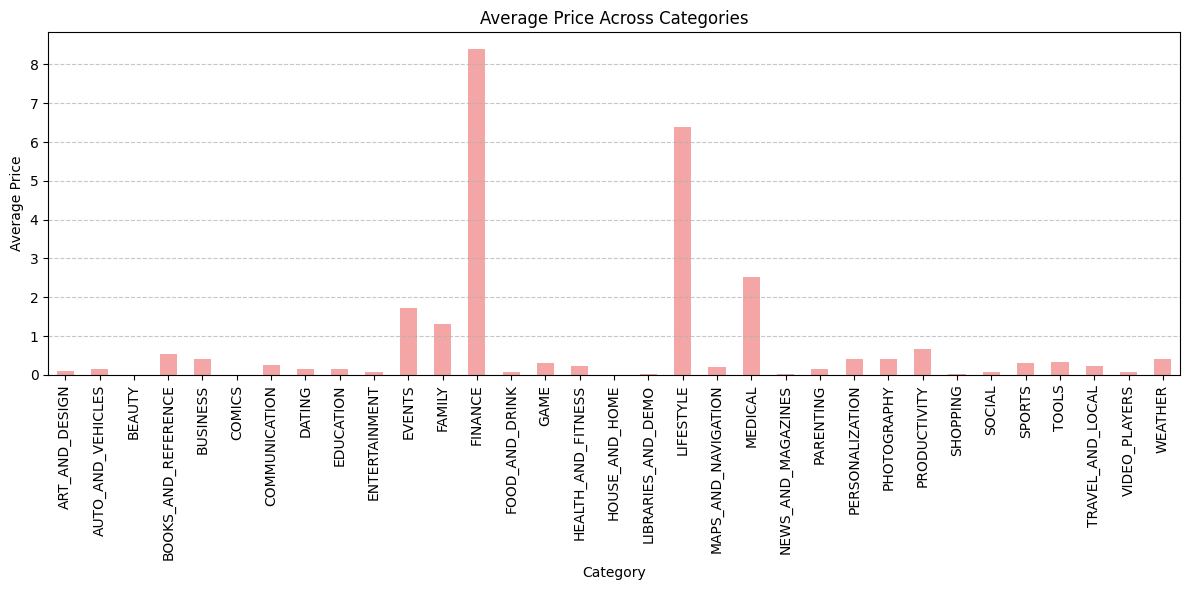

In [12]:
# Category analysis: Average rating, reviews, and price
category_stats = app_data.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'mean', 'Price': 'mean'})

# Visualize average ratings across categories
plt.figure(figsize=(12, 6))
category_stats['Rating'].plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Average Rating Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize average number of reviews across categories
plt.figure(figsize=(12, 6))
category_stats['Reviews'].plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Average Number of Reviews Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize average price across categories
plt.figure(figsize=(12, 6))
category_stats['Price'].plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Average Price Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Statistical & Correlation Analysis

In [13]:
# Statistical Testing (ANOVA) for comparing ratings across categories
import scipy.stats as stats
anova_result = stats.f_oneway(*(app_data[app_data['Category'] == category]['Rating'] for category in app_data['Category'].unique()))
print("ANOVA for Ratings Across Categories:")
print(anova_result)

# Correlation Analysis (example: correlation between ratings and reviews)
correlation = app_data.groupby('Category')[['Rating', 'Reviews']].corr().iloc[0::2,-1]
print("Correlation between Ratings and Reviews across Categories:")
print(correlation)

ANOVA for Ratings Across Categories:
F_onewayResult(statistic=nan, pvalue=nan)
Correlation between Ratings and Reviews across Categories:
Category                   
ART_AND_DESIGN       Rating    0.123846
AUTO_AND_VEHICLES    Rating    0.189965
BEAUTY               Rating    0.072928
BOOKS_AND_REFERENCE  Rating    0.102749
BUSINESS             Rating    0.079925
COMICS               Rating    0.113089
COMMUNICATION        Rating    0.065618
DATING               Rating    0.117640
EDUCATION            Rating    0.177367
ENTERTAINMENT        Rating    0.150341
EVENTS               Rating   -0.274495
FAMILY               Rating    0.079618
FINANCE              Rating    0.116345
FOOD_AND_DRINK       Rating    0.163726
GAME                 Rating    0.144069
HEALTH_AND_FITNESS   Rating    0.127619
HOUSE_AND_HOME       Rating    0.297688
LIBRARIES_AND_DEMO   Rating   -0.065689
LIFESTYLE            Rating    0.062395
MAPS_AND_NAVIGATION  Rating    0.128171
MEDICAL              Rating    0.1

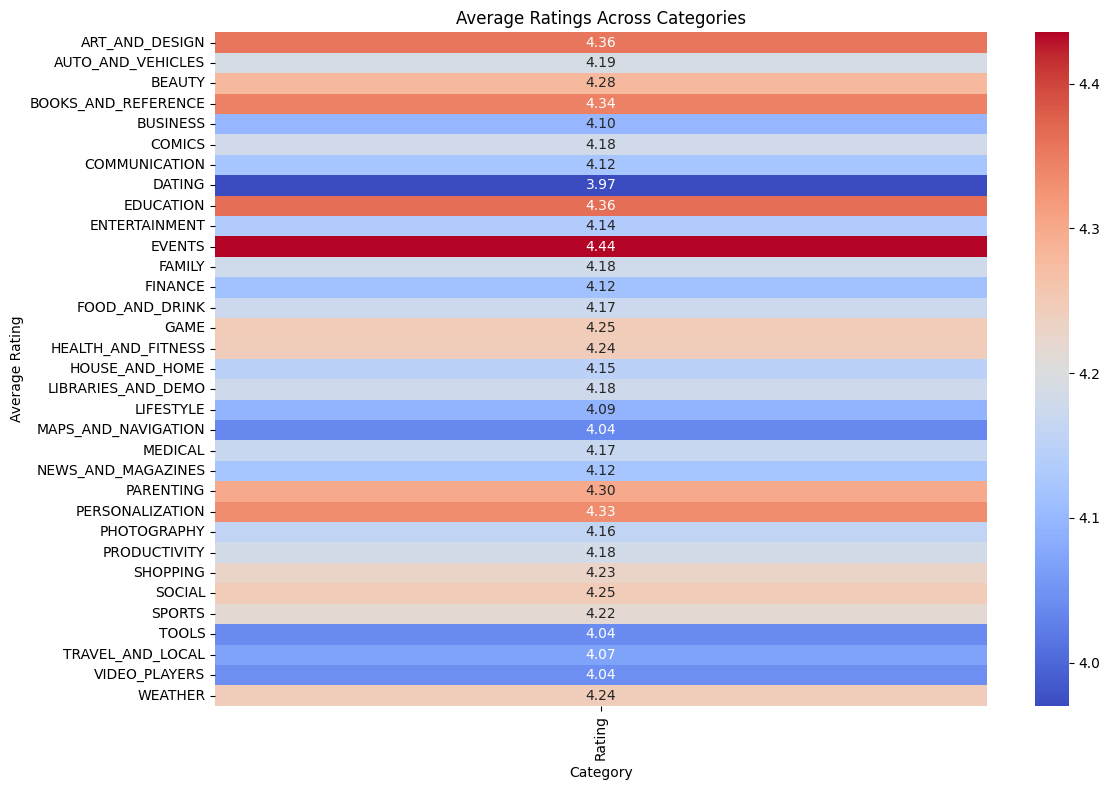

In [14]:
# Create a pivot table to aggregate average ratings by category
ratings_pivot = app_data.pivot_table(index='Category', values='Rating', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ratings_pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2 Key Concept and Challenge Completed
Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation)

# Metrics Analysis

App Rating Trend

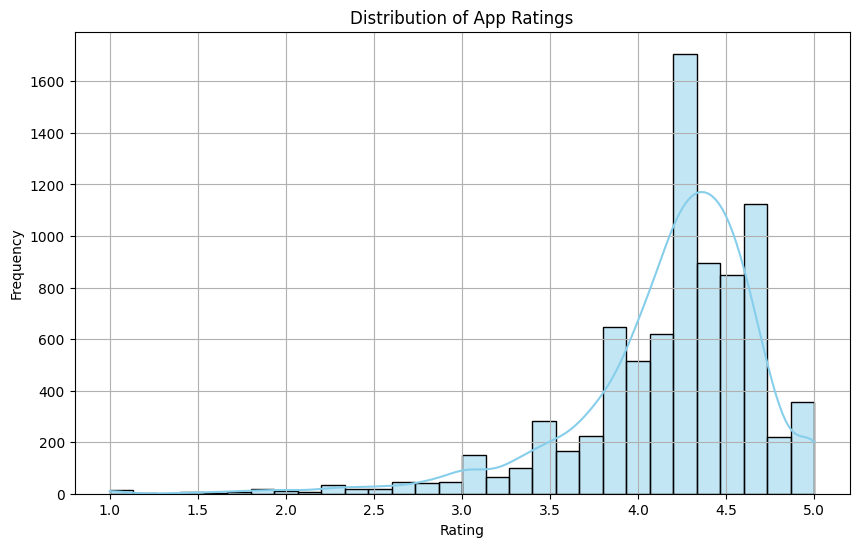

In [15]:
# Ratings Trend
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

App Size Trend

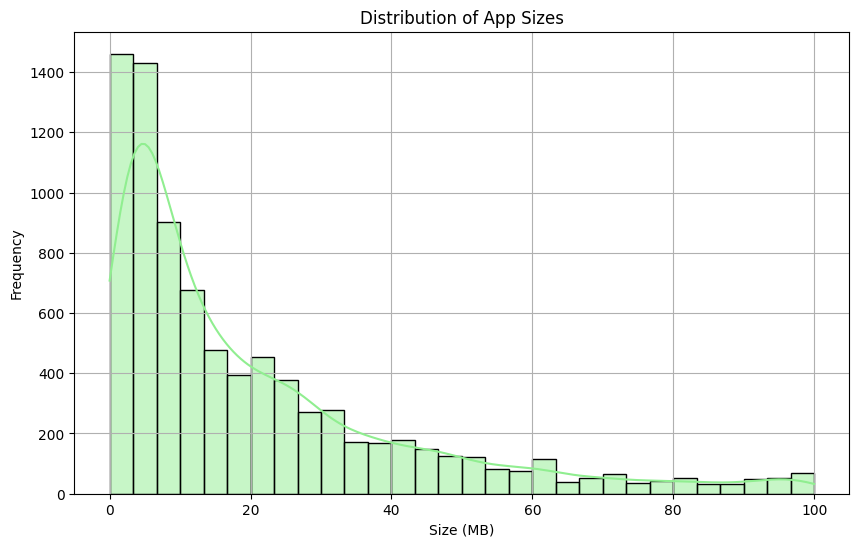

In [16]:
# Size Trend
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Size'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

App Installed Popularity Trend

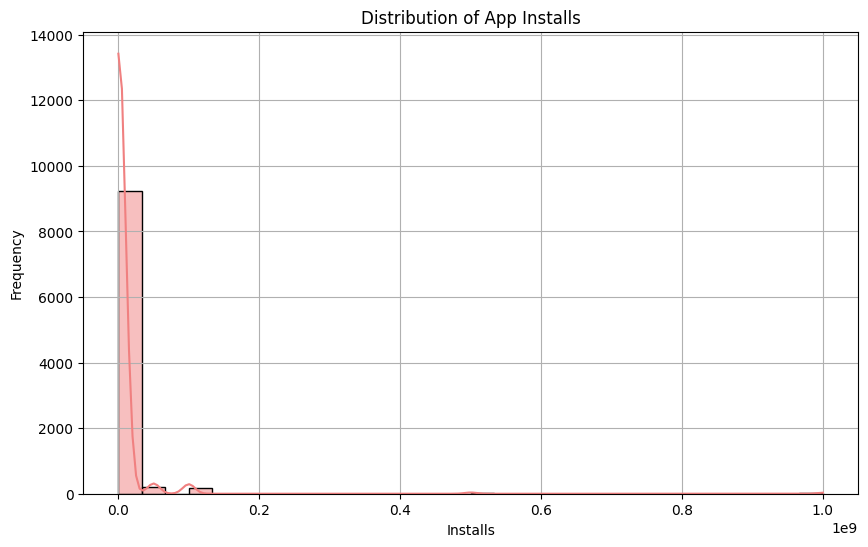

In [17]:
# Popularity Trend (Installs)
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Installs'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 3 Key Concept and Challenge Completed
Metrics Analysis: Examine app ratings, size, popularity, and pricing trends

# Sentiment Analysis

Sentiment Distribution:
Sentiment_Label
Neutral     30846
Positive    25719
Negative     7730
Name: count, dtype: int64


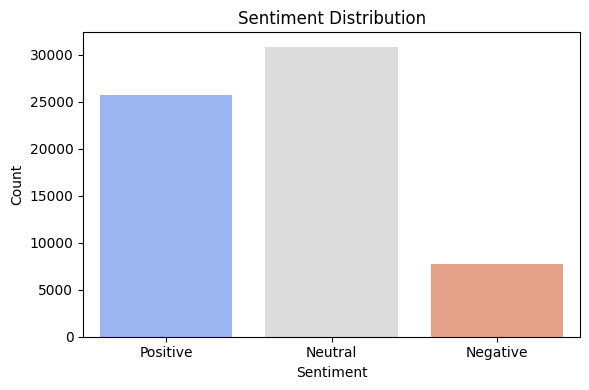

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Drop rows with missing reviews
userreview_data.dropna(subset=['Translated_Review'], inplace=True)

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
userreview_data['Sentiment'] = userreview_data['Translated_Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment
userreview_data['Sentiment_Label'] = userreview_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Print sentiment distribution
print("Sentiment Distribution:")
print(userreview_data['Sentiment_Label'].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=userreview_data, x='Sentiment_Label', hue='Sentiment_Label', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 4 Key Concept and Challenge Completed
Customer and Product Analysis: Analyze customer demographics and purchasing behavior

### Visualization

In [19]:
import plotly.express as px

# Convert 'Last Updated' column to datetime
app_data['Last Updated'] = pd.to_datetime(app_data['Last Updated'])

# Plot interactive visualization using Plotly
fig = px.line(app_data, x='Last Updated', y='Rating', title='App Ratings Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Rating')
fig.show()

### 5 Key Concept and Challenge Completed
Interactive Visualization: Utilize code for compelling visualizations

# Skill Enhancement

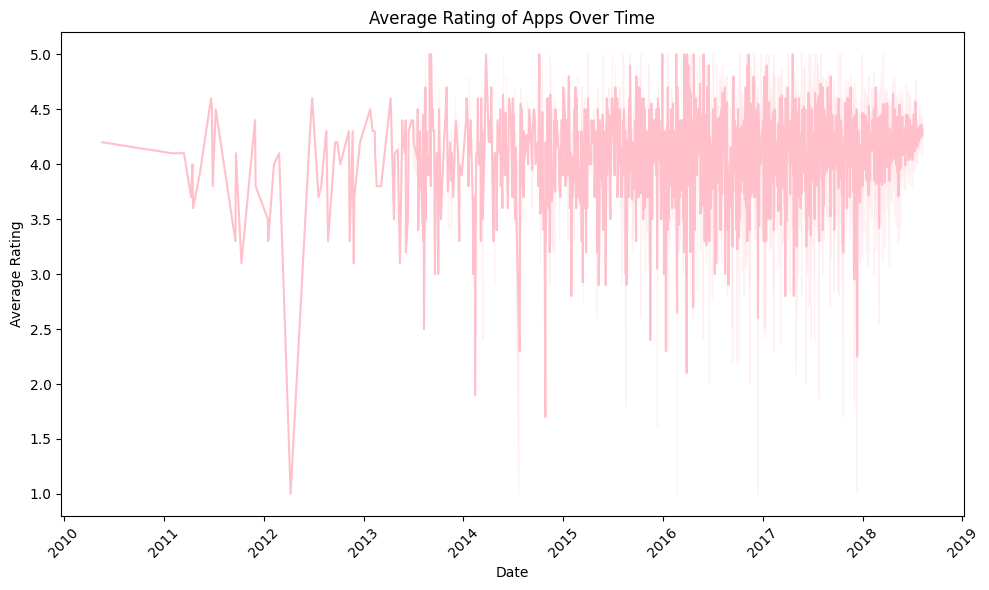

In [20]:
# Convert 'Last Updated' column to datetime
app_data['Last Updated'] = pd.to_datetime(app_data['Last Updated'])

# Plot average rating over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=app_data, x='Last Updated', y='Rating', color='pink')
plt.title('Average Rating of Apps Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

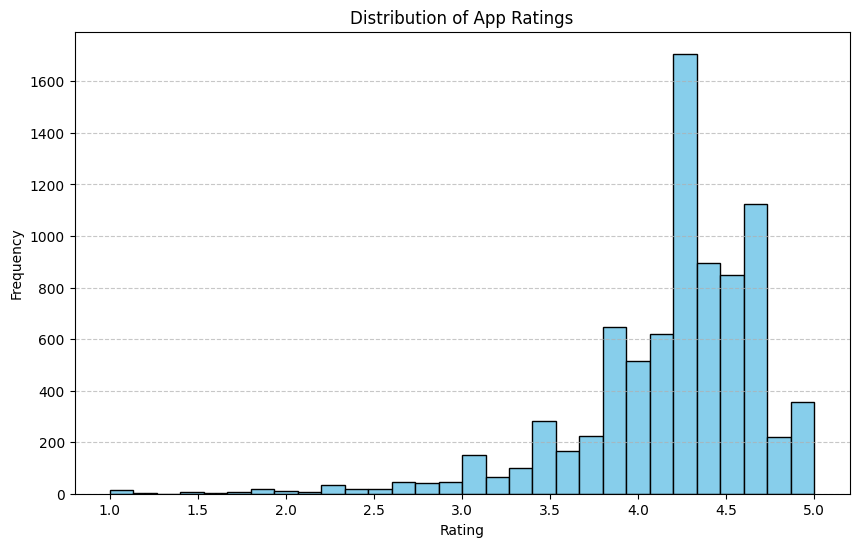

In [21]:
# Selecting app ratings from the dataset
ratings = app_data['Rating']

# Creating the histogram
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

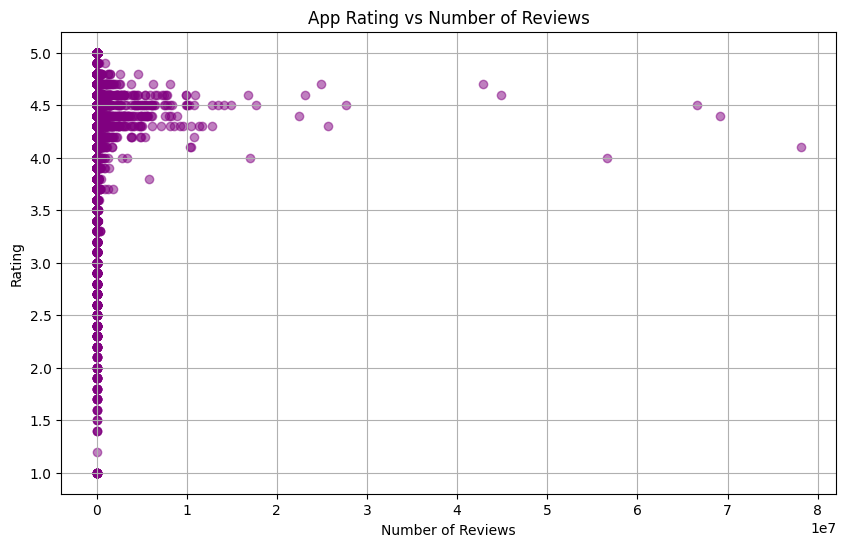

In [22]:
# Create a scatter plot for Reviews vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(app_data['Reviews'], app_data['Rating'], alpha=0.5, color='purple')
plt.title('App Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True)

# Show plot
plt.show()

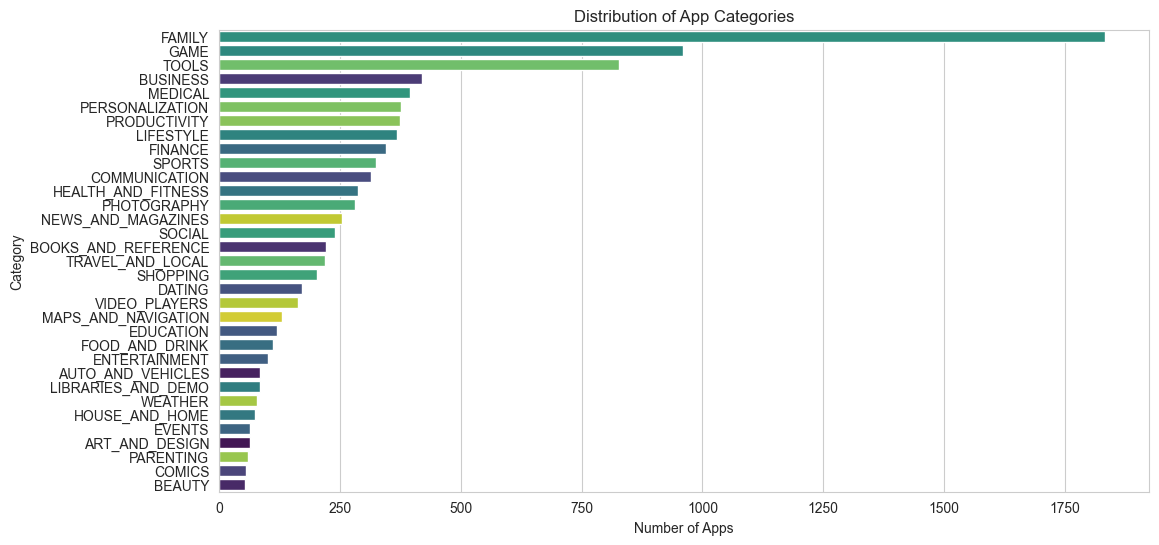

In [23]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot for the distribution of app categories
plt.figure(figsize=(12, 6))
sns.countplot(data=app_data, y='Category', hue='Category', palette='viridis', order=app_data['Category'].value_counts().index, legend=False)
plt.title('Distribution of App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

### 6 Key Concept and Challenge Completed
Skill Enhancement: Integrate insights from the "Understanding Data Visualization" course.
